In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=pd.read_csv('/content/drive/MyDrive/CVSfileHecktor/latentfeatures_hectktor.csv')
latentfeature=pathf
labdf='/content/drive/MyDrive/CVSfileHecktor/hecktor2021_patient_endpoint_training.csv'
labeldata=pd.read_csv(labdf)
P=labeldata['Progression']
T=labeldata['Progression free survival']
latentfeature.insert(192,'Progression',P)
latentfeature.insert(193,'Progression free survival',T)

In [4]:
latentfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,Progression,Progression free survival,f_191
0,CHGJ007,0.017182,0.002647,0.013916,0.028411,0.022093,0.146831,0.230962,0.209331,0.052728,0.022439,0.066935,0.385178,0.253954,0.229793,0.402009,0.383208,0.373360,0.256190,0.401119,0.025713,0.029186,0.193582,0.201060,0.168025,0.004773,0.092306,0.243481,0.081625,0.020572,0.008385,0.384779,0.368868,0.233253,0.089393,0.175141,0.024679,0.380625,0.415659,0.320612,...,0.173611,0.325517,0.039569,0.155022,0.002462,0.393443,0.399085,0.000377,0.004898,0.003244,0.000502,0.006265,0.120063,0.384409,0.395368,0.379350,0.007243,0.402559,0.089249,0.395360,0.090736,0.132309,0.043066,0.006837,0.268706,0.010315,0.089709,0.013767,0.156334,0.146630,0.027893,0.406696,0.187532,0.004626,0.312041,0.146887,0.409736,1,310,0.111851
1,CHGJ008,0.015692,0.002249,0.013440,0.027542,0.021579,0.163872,0.265710,0.247866,0.048986,0.020772,0.072716,0.397886,0.278078,0.233902,0.411534,0.389916,0.378421,0.293430,0.404841,0.025281,0.030585,0.195916,0.202959,0.191161,0.003982,0.103084,0.274187,0.087113,0.017539,0.007858,0.389501,0.377653,0.255099,0.098783,0.197358,0.021692,0.384678,0.417276,0.326544,...,0.191268,0.329373,0.040347,0.168256,0.002091,0.397291,0.402016,0.000270,0.004215,0.002753,0.000373,0.005258,0.143618,0.390134,0.400284,0.390099,0.006225,0.408590,0.089177,0.398886,0.097895,0.143497,0.045514,0.006371,0.295667,0.008896,0.098391,0.013265,0.165532,0.142725,0.028392,0.414258,0.217375,0.003722,0.328719,0.144921,0.409380,0,2037,0.118264
2,CHGJ010,0.016791,0.002451,0.012287,0.027929,0.020429,0.164934,0.257898,0.241920,0.051213,0.022622,0.065055,0.394281,0.270229,0.235192,0.410129,0.392034,0.384534,0.290871,0.408465,0.025973,0.029032,0.198582,0.203594,0.186629,0.004221,0.101485,0.267971,0.077784,0.018375,0.007437,0.387788,0.378531,0.221793,0.098634,0.176050,0.022733,0.385620,0.421353,0.328931,...,0.194393,0.329736,0.041154,0.148881,0.001976,0.399730,0.406119,0.000303,0.004156,0.002956,0.000413,0.005651,0.127051,0.393448,0.401127,0.387321,0.006557,0.410473,0.090932,0.400835,0.093863,0.141649,0.041224,0.006660,0.267689,0.008836,0.093821,0.013746,0.170242,0.144003,0.025944,0.415468,0.214440,0.004025,0.330962,0.146206,0.417162,0,1917,0.120174
3,CHGJ013,0.015954,0.002119,0.013436,0.028046,0.020255,0.169722,0.271343,0.247982,0.048904,0.021352,0.069634,0.398812,0.289652,0.230877,0.409854,0.394815,0.386615,0.302449,0.407820,0.025689,0.030657,0.199161,0.203948,0.193407,0.003954,0.102360,0.285942,0.089277,0.016515,0.007286,0.390607,0.387165,0.261394,0.100304,0.209045,0.020473,0.387063,0.421665,0.336097,...,0.202092,0.330636,0.040641,0.175785,0.001952,0.399581,0.407281,0.000241,0.003984,0.002499,0.000336,0.004919,0.130840,0.398693,0.402099,0.397423,0.006168,0.415649,0.086234,0.408635,0.101347,0.150786,0.042876,0.006191,0.320169,0.008851,0.101911,0.013063,0.169479,0.141645,0.026732,0.412276,0.218787,0.003384,0.326758,0.144895,0.415779,0,1377,0.119332
4,CHGJ015,0.015851,0.002194,0.013181,0.027601,0.020960,0.168940,0.260977,0.243595,0.049384,0.021330,0.070501,0.398497,0.279489,0.234437,0.415066,0.392376,0.383963,0.301981,0.408079,0.025278,0.029878,0.197921,0.203759,0.189436,0.003939,0.101699,0.278951,0.087325,0.017206,0.007544,0.392213,0.382303,0.254845,0.101036,0.199511,0.021362,0.387512,0.419641,0.331465,...,0.199618,0.331390,0.040472,0.170432,0.002011,0.400047,0.405875,0.000257,0.004119,0.002625,0.000353,0.005107,0.135102,0.394539,0.402520,0.393949,0.006178,0.412794,0.088188,0.403815,0.098603,0.146233,0.043713,0.006295,0.302682,0.008918,0.098548,0.013219,0.171050,0.143546,0.027244,0.417709,0.213760,0.003587,0.33091

In [5]:
latentfeature.rename(columns={'Progression free survival':'target'}, inplace=True)

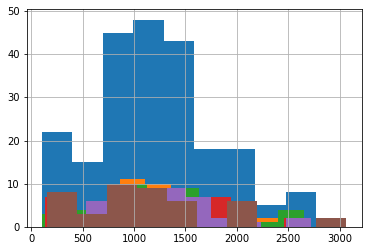

In [6]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = latentfeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [7]:
!pip install lifelines

     |████████████████████████████████| 348 kB 8.2 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=34cf4c0caf2d5bc98fb4443e30b6539903b3530c6ac7a7ff5dfe7d16c8da5f71
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


[09:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 554.4903561601373
[09:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 639.392057398475
[09:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 672.4261234983353
[09:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 527.6390944820616
Concordance index_XGB_fold1: 0.5848484848484848
Concordance index_XGB_fold2: 0.5252525252525253
Concordance index_XGB_fold3: 0.5363636363636364
Concordance index_XGB_fold4: 0.5222672064777328


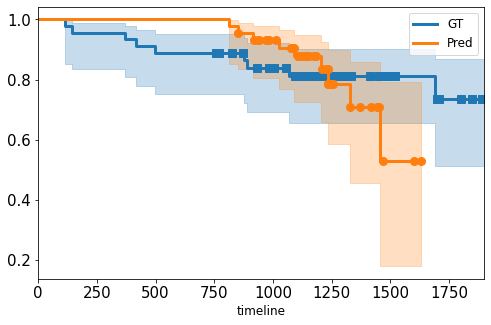

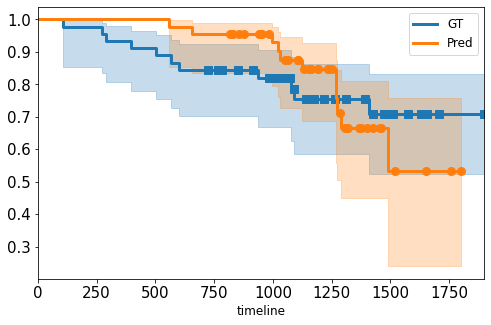

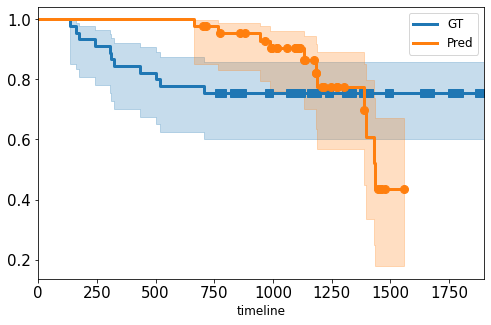

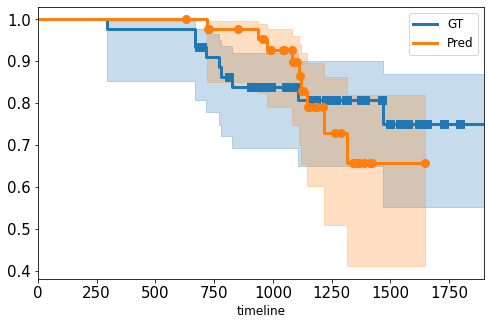

In [8]:
#XGBRegressor model
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)


0 567.0351309521797
1 627.6019335411048
2 656.7059288195559
3 489.3888546023273
Concordance index_XGB_fold1: 0.5424242424242425
Concordance index_XGB_fold2: 0.5545454545454546
Concordance index_XGB_fold3: 0.5565656565656566
Concordance index_XGB_fold4: 0.5394736842105263


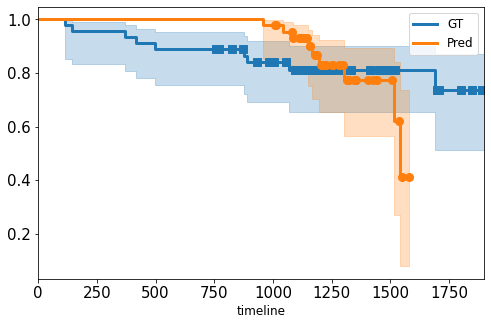

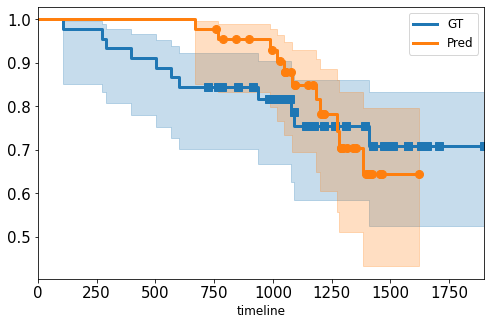

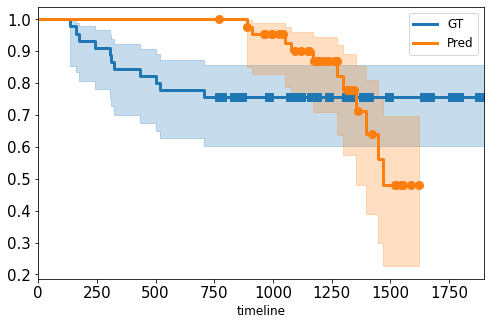

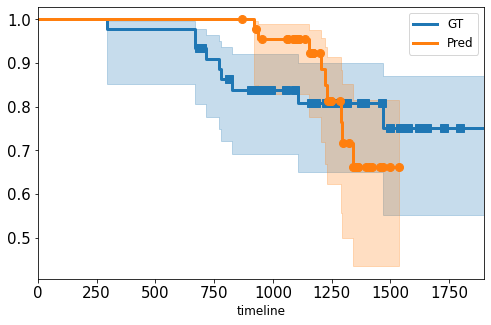

In [10]:
#XGBRegressor model
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=RandomForestRegressor(n_estimators=500)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 765.4296832498724
1 1018.2440113581158
2 978.793054963328
3 822.7281581556707
Concordance index_XGB_fold1: 0.5308080808080808
Concordance index_XGB_fold2: 0.4702020202020202
Concordance index_XGB_fold3: 0.4353535353535353
Concordance index_XGB_fold4: 0.5156882591093117


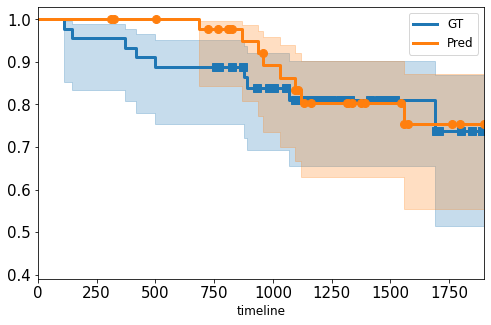

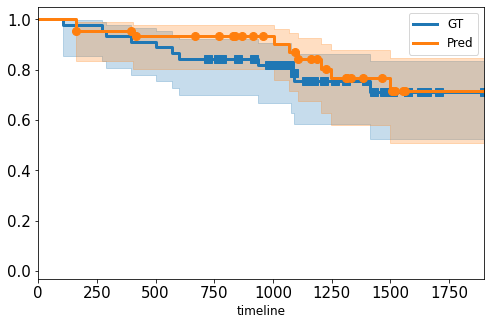

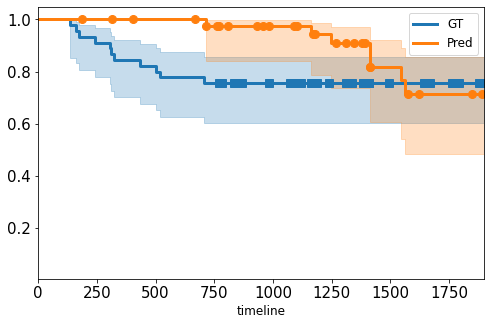

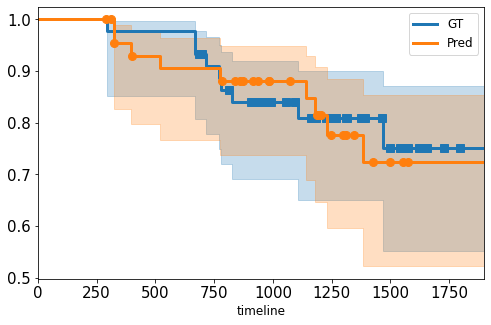

In [12]:
#DecisionTreeRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=DecisionTreeRegressor()
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

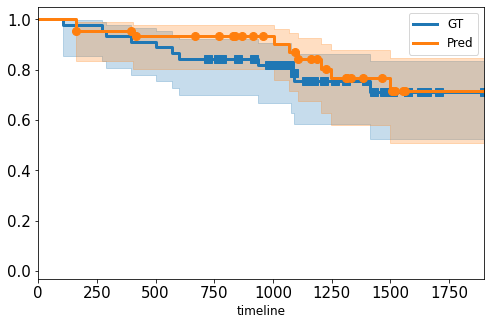

In [13]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

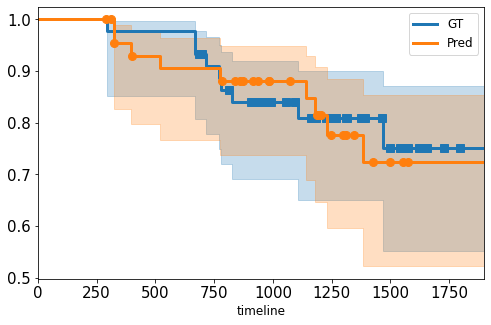

In [14]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

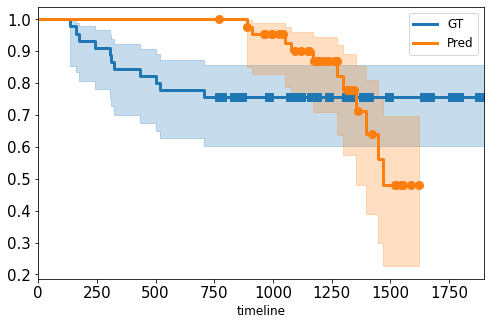

In [11]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#GradientBoostingRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= GradientBoostingRegressor(n_estimators=700,random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#RandomForestRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= RandomForestRegressor(random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#DecisionTreeRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#xtraTreesRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= xtraTreesRegressor(n_estimators=100, random_state=42) 
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#BaggingRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model= BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#StackingRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
  model= StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#XGBRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht=os.path.join(path,'topfeature_fold.csv')
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
#df = pd.read_csv(patht)
df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  params = {'learning_rate': 0.07853392035787837, 
            'reg_lambda': 1.7549293092194938e-05, 
            'reg_alpha': 14.68267919457715, 
            'subsample': 0.8031450486786944, 
            'colsample_bytree': 0.170759104940733, 
            'max_depth': 3}
    
  model = XGBRegressor(random_state=0, #tree_method='gpu_hist',#gpu_id=0,#predictor="gpu_predictor",
                       n_estimators=5000,**params)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [ ]:
#### All Regressor models based on latent features
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht='/content/drive/MyDrive/CVSfileHecktor/combined_features.csv'
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'

class model_selection:
    def __init__(self,root,model_selec):
        self.root=root
        self.model_selec=model_selec
        self.df = df_train
        self.useful_features = [c for c in self.df.columns if c not in ("PatientID", "target","Progression", "kfold")]
    def model_selction(self):
        final_predictions = []
        final_true = []
        y_eventf=[]
        for fold in range(4):
            xtrain =  self.df[self.df.kfold != fold].reset_index(drop=True)
            xvalid = self.df[self.df.kfold == fold].reset_index(drop=True)
            #xtest = df_test.copy()

            ytrain = xtrain.target
            yvalid = xvalid.target
            y_event=xvalid.Progression
    
            xtrain = xtrain[self.useful_features]
            xvalid = xvalid[self.useful_features]
            min_max_scaler = preprocessing.MinMaxScaler()
            xtrain= min_max_scaler.fit_transform(xtrain)
            xvalid= min_max_scaler.transform(xvalid)
            if self.model_selec=='XGB':
                model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
                model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
                #model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
    
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
        
            elif self.model_selec=='GB':
                model = GradientBoostingRegressor(n_estimators=700,random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='RF':
                model = RandomForestRegressor(random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
            
            
            elif self.model_selec=='DT':
                model = DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
               
            elif self.model_selec=='ET':
                
                model=ExtraTreesRegressor(n_estimators=100, random_state=42) 
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='BR':
                model=BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='SR':
                estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
                model= StackingRegressor(estimators=estimators,
                                         final_estimator=RandomForestRegressor(n_estimators=10,
                                                                               random_state=42)
                                         )
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='VR':
                r1 = LinearRegression()
                r2 = RandomForestRegressor(n_estimators=10, random_state=42)
                model= VotingRegressor([('lr', r1), ('rf', r2)])
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='HGB':
                model= HistGradientBoostingRegressor()
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='XGbOPTM':
                params = {'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715, 'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733, 'max_depth': 3}
    
                model = XGBRegressor(random_state=0, #tree_method='gpu_hist',
                                     #gpu_id=0,
                                     #predictor="gpu_predictor",
                                     n_estimators=5000,
                                     **params
                                     )
                model.fit(xtrain, ytrain, early_stopping_rounds=300, eval_set=[(xvalid, yvalid)], verbose=1000)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                #rmse = mean_squared_error(yvalid, preds_valid, squared=False)
                #print(fold, rmse)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
            
            
        preds = np.mean(np.column_stack(final_predictions), axis=1)
        true = np.mean(np.column_stack(final_true), axis=1)
        y_eventn=np.mean(np.column_stack(y_eventf), axis=1)
        return preds,true,y_eventn
    
  
model= HistGradientBoostingRegressor()    
  
selction=['XGB','GB','RF','DT','ET','BR','SR','VR','HGB','XGbOPTM']
dfdic={'pred':[],'GT':[],'event':[],}
for i in selction:
    #model_selec='XGB'
    model1=model_selection(patht,i) 
    preds,true,y_eventn=model1.model_selction() 
    dfdic['pred'].append(preds)
    dfdic['GT'].append(true)
    dfdic['event'].append(y_eventn)


dff=pd.DataFrame(dfdic['GT']).T
dff.rename(columns={0:'target'}, inplace=True)
gt=dff['target']
dff1=pd.DataFrame(dfdic['event']).T
#print(dff1)
#dff.rename(columns={11:'event'}, inplace=True)
modelspred=pd.DataFrame(dfdic['pred']).T

modelspred.rename(columns={0:'XGB',
                       1:'GB',
                       2:'RF',
                       3:'DT',
                       4:'ET',
                       5:'BT',
                       6:'SR',
                       7:'VR',
                       8:'HGB',
                       9:'XGbOPTM',}, inplace=True)

Results=pd.concat([modelspred,gt],axis=1)

In [ ]:
GT=Results['target']
XGB=Results['XGB']
GB=Results['GB']
RF=Results['RF']
DT=Results['DT']
ET=Results['ET']
BT=Results['BT']
SR=Results['SR']
VR=Results['VR']
HGB=Results['HGB']
XGbOPTM=Results['XGbOPTM']
print(f'Concordance index_XGB: {concordance_index(GT,XGB)}')
print(f'Concordance index_GB: {concordance_index(GT,GB)}')
print(f'Concordance index_RF: {concordance_index(GT,RF)}')
print(f'Concordance index_DT: {concordance_index(GT,DT)}')
print(f'Concordance index_ET: {concordance_index(GT,ET)}')
print(f'Concordance index_BT: {concordance_index(GT,BT)}')
print(f'Concordance index_SR: {concordance_index(GT,SR)}')
print(f'Concordance index_VR: {concordance_index(GT,VR)}')
print(f'Concordance index_HGB: {concordance_index(GT,HGB)}')
print(f'Concordance index_XGbOPTM: {concordance_index(GT,XGbOPTM)}')